In [7]:
import pandas as pd

In [8]:
Data_Set1 = pd.read_csv("./Data_Set.csv")


In [9]:
Data_Set2 = pd.read_csv("./Data_Set.csv", header=2) #especific head


In [10]:
Data_Set3 = Data_Set2.rename(columns={"Temperature": "Temp"}) #change name columns

In [11]:
Data_Set4 = Data_Set3.drop("No. Occupants", axis=1) #delete column

In [12]:
Data_Set3.drop("No. Occupants", axis=1, inplace=True)

In [13]:
Data_Set5 = Data_Set4.drop(2, axis=0) #remove row not column

In [14]:
Data_Set6 = Data_Set5.reset_index(drop=True) #restore index sort
print(Data_Set6)

    Time  E_Plug  E_Heat Price  Temp
0      1    24.0      28    10   -15
1      2    17.0      32    12   -17
2      3    16.0      34    11   -19
3      4    16.0      33    12   -18
4      5    16.0      30    10   -14
5      6    16.0      31    10   -16
6      7    19.0      28    14   -14
7      8    22.0      29    12   -15
8      9    25.0      26    12   -12
9     10    26.0      24    14    -8
10    11    27.0      20    14    -4
11    12    30.0      19    16     0
12    13    30.0      19    16     0
13    14     NaN      13    17     2
14    15    27.0      14    17     3
15    16    27.0      16    17     2
16    17    28.0      -4    18     0
17    18    33.0      26    20    -6
18    19    42.0      32    21    -8
19    20   120.0      33    21   -12
20    21    47.0      32    21   -16
21    22    44.0      30    22   -18
22    23    36.0      35     !   -19
23    24    37.0      36    18   -22


In [15]:
Data_Set6.describe()

,Time,E_Plug,E_Heat,Temp
count,24.000000,23.000000,24.000000,24.000000
mean,12.500000,31.521739,25.666667,-10.250000
std,7.071068,21.336843,9.262672,7.968689
min,1.000000,16.000000,-4.000000,-22.000000
25%,6.750000,20.500000,19.750000,-16.250000
50%,12.500000,27.000000,28.500000,-13.000000
75%,18.250000,34.500000,32.000000,-3.000000
max,24.000000,120.000000,36.000000,3.000000


In [16]:
Min_item = Data_Set6["E_Heat"].min()
print(Min_item)

-4


In [17]:
Data_Set6["E_Heat"][Data_Set6["E_Heat"] == Min_item]

16   -4
Name: E_Heat, dtype: int64

In [18]:
Data_Set6["E_Heat"].replace(-4, 21, inplace=True)

# Covariance: show the relation between  variables (features)

In [19]:
Data_Set6.cov()

,Time,E_Plug,E_Heat,Temp
Time,50.000000,88.535573,-0.500000,8.217391
E_Plug,88.535573,455.260870,25.833992,0.154150
E_Heat,-0.500000,25.833992,47.346014,-51.206522
Temp,8.217391,0.154150,-51.206522,63.500000


In [20]:
import seaborn as sn

<AxesSubplot:>

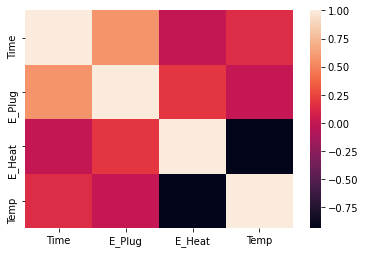

In [21]:
sn.heatmap(Data_Set6.corr())

# Missing value: NaN and Null values

In [22]:
Data_Set6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    24 non-null     int64  
 1   E_Plug  23 non-null     float64
 2   E_Heat  24 non-null     int64  
 3   Price   24 non-null     object 
 4   Temp    24 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [23]:
import numpy as np

In [24]:
Data_Set7 = Data_Set6.replace("!", np.NaN)

In [25]:
Data_Set7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    24 non-null     int64  
 1   E_Plug  23 non-null     float64
 2   E_Heat  24 non-null     int64  
 3   Price   23 non-null     object 
 4   Temp    24 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [26]:
# Data_Set7 = Data_Set7.apply(pd.to_numeric)

# Missing value 2

In [27]:
Data_Set7.isnull()

,Time,E_Plug,E_Heat,Price,Temp
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [28]:
Data_Set7.drop(13, axis=0, inplace=True)

In [29]:
Data_Set7.dropna(axis=0, inplace=True)

In [30]:
Data_Set8 = Data_Set7.fillna(method="ffill")

In [31]:
from sklearn.impute import SimpleImputer

In [32]:
M_Var = SimpleImputer(missing_values=np.nan, strategy="mean")

In [33]:
M_Var.fit(Data_Set7)

SimpleImputer()

In [34]:
Data_Set9 = M_Var.transform(Data_Set7)

# Outlier Detection

<AxesSubplot:>

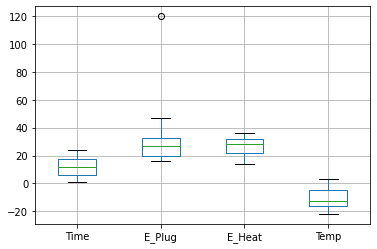

In [36]:
Data_Set8.boxplot()

In [39]:
Data_Set8["E_Plug"].quantile(0.25)

19.75

In [40]:
Data_Set8["E_Plug"].quantile(0.75)

32.25

In [41]:
# Q1 = 19.75 
# Q3 = 32.25
# IQR = 32.25 - 19.75 = 12.5
# Mild Outlier
# Lower Bound = Q1 - 1.5*IQR = 19.75 - 1.5*12.5 = 1
# upper bound = Q3 + 1.5*IQR = 32.25 + 1.5*12.5 = 51

# Extreme outlier
    #upper bound = Q3 + 3*IQR = 32.25 + 3*12.5 = 69.75
    #   